In [1]:
%load_ext autoreload
%autoreload 2
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
from dark_emulator_public import dark_emulator
import os, sys, time, json, copy
import matplotlib.pyplot as plt
from collections import OrderedDict as od
from scipy.interpolate import InterpolatedUnivariateSpline as ius
from scipy.interpolate import interp2d, interp1d
from scipy.integrate import simps
from tqdm import tqdm
import hsc3x2pt

using dark_emulator at  /Users/sunao-mac/Documents/python_package/dark_emulator_public/dark_emulator/__init__.py


In [3]:
power_b1 = hsc3x2pt.power_b1_class()

initialize cosmo_class
Initialize pklin emulator
initialize propagator emulator
Initialize sigma_d emulator
initialize cross-correlation emulator
initialize auto-correlation emulator
Initialize sigmaM emulator
initialize xinl emulator


# Year 1, single source bin analysis

In [26]:
%%time
dirname = './single_source_ClY1'
fisher2x2pt = hsc3x2pt.getFisher(dirname, power_b1, probes=['w', 'gamma_t'], label='2x2pt (Y1, 1)')
fisherCS = hsc3x2pt.getFisher(dirname, power_b1, probes=['xi+','xi-'], label='Cosmic Shear (Y1, 1)')
fisher3x2pt = hsc3x2pt.getFisher(dirname, power_b1, label='3x2pt (Y1, 1)')

cov.shape = (66, 66), dim(data)=(66,)
cov.shape = (17, 17), dim(data)=(17,)
skip b1lowz because this is lens galaxy param, while probes does not include any lens related probe.
skip b1cmass1 because this is lens galaxy param, while probes does not include any lens related probe.
skip b1cmass2 because this is lens galaxy param, while probes does not include any lens related probe.
skip alphamaglowz because this is lens galaxy param, while probes does not include any lens related probe.
skip alphamagcmass1 because this is lens galaxy param, while probes does not include any lens related probe.
skip alphamagcmass2 because this is lens galaxy param, while probes does not include any lens related probe.
cov.shape = (83, 83), dim(data)=(83,)
CPU times: user 16 s, sys: 795 ms, total: 16.8 s
Wall time: 7.51 s


In [27]:
fisher2x2pt.show1Sigma()

omega_b         -- 0.03274069152984936
omega_c         -- 0.07512944702656188
Omega_de        -- 0.010474396211280617
sigma8          -- 0.09833015262448819
ns              -- 0.17968992891616226
b1lowz          -- 0.3920982056886129
b1cmass1        -- 0.24142043701541605
b1cmass2        -- 0.2481079051147268
alphamaglowz    -- 104.53993925201134
alphamagcmass1  -- 21.978724038991405
alphamagcmass2  -- 21.426995196125574
dzph            -- 1.135618459375874
dm              -- 0.5987691015574907


In [28]:
fisherCS.show1Sigma()

omega_b   -- 1.6545017071196702
omega_c   -- 4.952846194236103
Omega_de  -- 10.659086777971845
sigma8    -- 7.5729918102399525
ns        -- 6.75540433023676
dzph      -- 10.394232822126764
dm        -- 7.699088560919898


In [29]:
fisher3x2pt.show1Sigma()

omega_b         -- 0.03111957162484601
omega_c         -- 0.0676273273490864
Omega_de        -- 0.00871154241481252
sigma8          -- 0.07941928766413008
ns              -- 0.12564616287744898
b1lowz          -- 0.30679260976946826
b1cmass1        -- 0.22125759758117391
b1cmass2        -- 0.23517589435997158
alphamaglowz    -- 62.027069893372676
alphamagcmass1  -- 5.960636952362985
alphamagcmass2  -- 4.116346006478212
dzph            -- 0.3875725068806686
dm              -- 0.34282158449791866


In [31]:
corner = hsc3x2pt.corner_class()

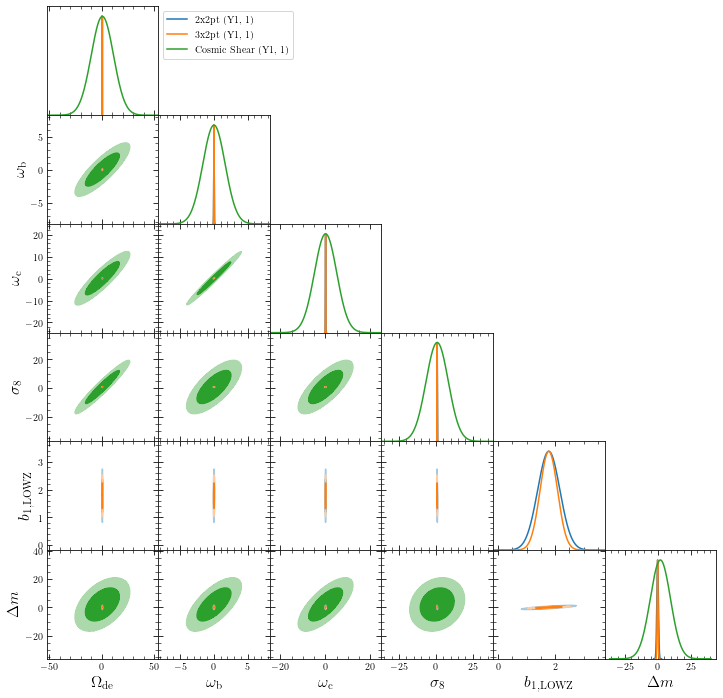

In [33]:
corner.plot_corner([fisher2x2pt, fisher3x2pt, fisherCS], ['Omega_de', 'omega_b', 'omega_c', 'sigma8', 'b1lowz', 'dm'], 
                   figsize_ratio=2, usetex=True)

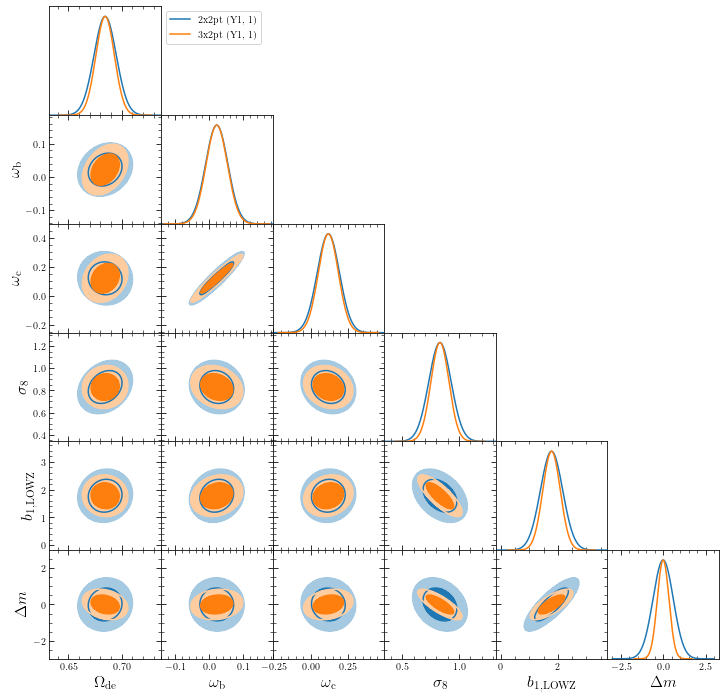

In [34]:
corner.plot_corner([fisher2x2pt, fisher3x2pt], ['Omega_de', 'omega_b', 'omega_c', 'sigma8', 'b1lowz', 'dm'], 
                   figsize_ratio=2, usetex=True)

# Year 1, double source bin analysis

In [35]:
%%time
dirname = './double_source_ClY1'
fisher2x2pt2 = hsc3x2pt.getFisher(dirname, power_b1, probes=['w', 'gamma_t'], label='2x2pt (Y1, 2)')
fisherCS2 = hsc3x2pt.getFisher(dirname, power_b1, probes=['xi+','xi-'], label='Cosmic Shear (Y1, 2)')
fisher3x2pt2 = hsc3x2pt.getFisher(dirname, power_b1, label='3x2pt (Y1, 2)')

cov.shape = (90, 90), dim(data)=(90,)
cov.shape = (51, 51), dim(data)=(51,)
skip b1lowz because this is lens galaxy param, while probes does not include any lens related probe.
skip b1cmass1 because this is lens galaxy param, while probes does not include any lens related probe.
skip b1cmass2 because this is lens galaxy param, while probes does not include any lens related probe.
skip alphamaglowz because this is lens galaxy param, while probes does not include any lens related probe.
skip alphamagcmass1 because this is lens galaxy param, while probes does not include any lens related probe.
skip alphamagcmass2 because this is lens galaxy param, while probes does not include any lens related probe.
cov.shape = (141, 141), dim(data)=(141,)
CPU times: user 32.3 s, sys: 2.43 s, total: 34.8 s
Wall time: 20.9 s


In [36]:
fisher2x2pt2.show1Sigma()

omega_b         -- 0.032688060835203564
omega_c         -- 0.07497829862801332
Omega_de        -- 0.0104648995746211
sigma8          -- 0.09815366041674874
ns              -- 0.17925050172676674
b1lowz          -- 0.3902461119401956
b1cmass1        -- 0.2409548111729854
b1cmass2        -- 0.24806177140920677
alphamaglowz    -- 103.98554060034074
alphamagcmass1  -- 21.605362292023877
alphamagcmass2  -- 21.05433658973172
dzph1           -- 0.8254154689547542
dm1             -- 0.5842074110596985
dzph2           -- 1.5243640079974323
dm2             -- 0.6113650277172533


In [37]:
fisherCS2.show1Sigma()

omega_b   -- 0.5059858608846936
omega_c   -- 1.131142053173569
Omega_de  -- 1.6208548308981778
sigma8    -- 1.0746640536136376
ns        -- 1.1624332651827325
dzph1     -- 1.3498312427929486
dm1       -- 2.2153126107311887
dzph2     -- 1.7664002831842263
dm2       -- 2.3113876692381865


In [38]:
fisher3x2pt2.show1Sigma()

omega_b         -- 0.031052237007028756
omega_c         -- 0.06651477574911396
Omega_de        -- 0.00822473046350505
sigma8          -- 0.06982940834345454
ns              -- 0.11039881019793112
b1lowz          -- 0.2572258875313734
b1cmass1        -- 0.2145723752826211
b1cmass2        -- 0.23014390818127284
alphamaglowz    -- 50.04397437532137
alphamagcmass1  -- 5.876144289619636
alphamagcmass2  -- 3.2241239627356046
dzph1           -- 0.13222479944720347
dm1             -- 0.17859352787389063
dzph2           -- 0.20098125099899403
dm2             -- 0.18969716080973476


In [39]:
corner = hsc3x2pt.corner_class()

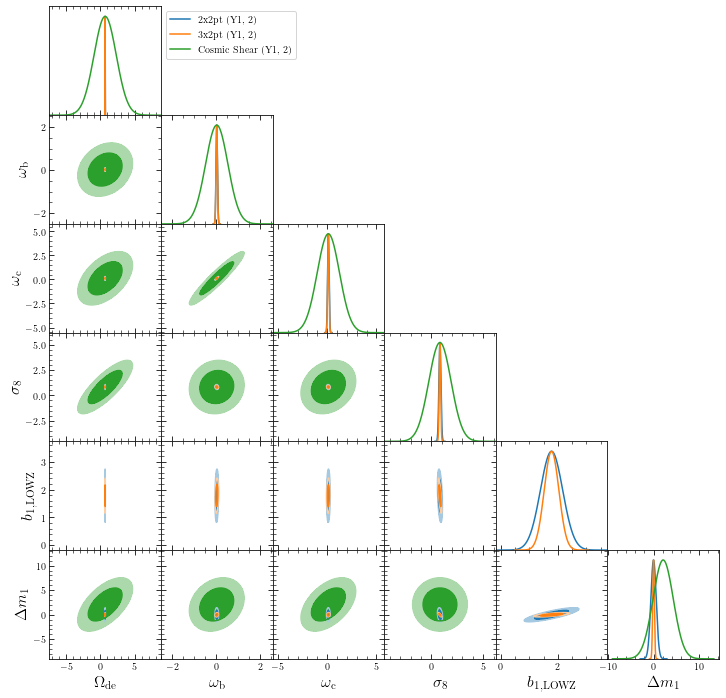

In [40]:
corner.plot_corner([fisher2x2pt2, fisher3x2pt2, fisherCS2], ['Omega_de', 'omega_b', 'omega_c', 'sigma8', 'b1lowz', 'dm1'], 
                   figsize_ratio=2, usetex=True)

## double vs single source anlaysis

dm1 is not included any fisher analysis. Omitting it.
dzph1 is not included any fisher analysis. Omitting it.


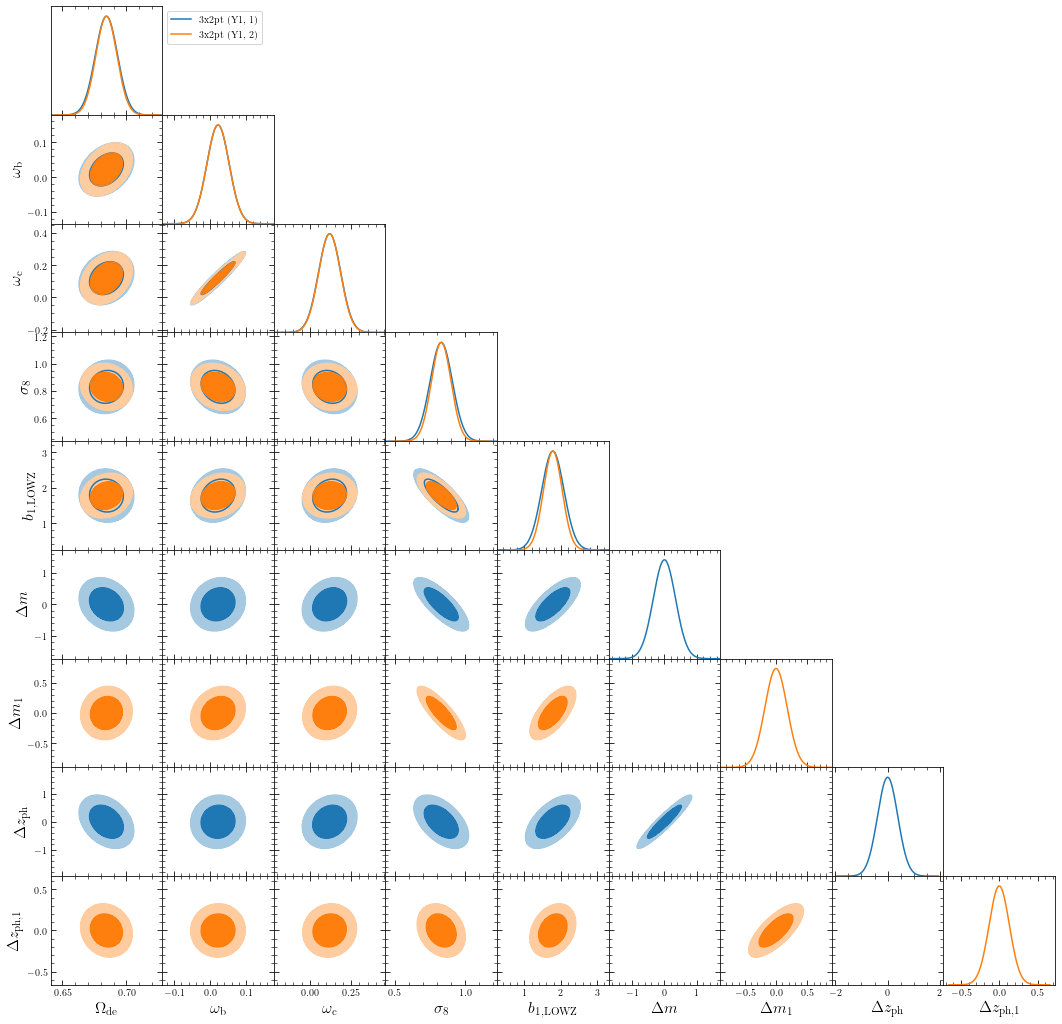

In [41]:
corner.plot_corner([fisher3x2pt, fisher3x2pt2], ['Omega_de', 'omega_b', 'omega_c', 'sigma8', 'b1lowz', 'dm', 'dm1', 'dzph', 'dzph1'], 
                   figsize_ratio=2, usetex=True)